<a href="https://colab.research.google.com/github/venkatbiotek/ccvc/blob/main/Microplastics_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup Colab Environment

In [1]:
# Install necessary libraries
!pip install pandas matplotlib seaborn plotly geopandas

In [27]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

Upload Data to Colab

Click the folder icon (📁) in Colab → Upload all 4 CSVs. Or use code: Then upload:

    samples_geocoded.csv

    sample_methodology.csv

    validation_rules_samples_merged.csv

    validation_rules_samples_methodology.csv

In [31]:
from google.colab import files
uploaded = files.upload()

Saving sample_methodology.xls to sample_methodology.xls
Saving samples_geocoded.xls to samples_geocoded.xls
Saving validation_rules_samples_merged.xls to validation_rules_samples_merged.xls
Saving validation_rules_samples_methodology.xls to validation_rules_samples_methodology.xls


Step 3: Load the Data

In [32]:
import pandas as pd

In [33]:
geo_df = pd.read_csv('samples_geocoded.xls')
method_df = pd.read_csv('sample_methodology.xls')
valid_df = pd.read_csv('validation_rules_samples_merged.xls')
valid_method_df = pd.read_csv('validation_rules_samples_methodology.xls')

In [34]:
import os
os.listdir()

['.config',
 'validation_rules_samples_merged.xls',
 '.ipynb_checkpoints',
 'validation_rules_samples_methodology.xls',
 'sample_methodology.xls',
 'samples_geocoded.xls',
 'sample_data']

In [35]:
['samples_geocoded.csv', 'sample_methodology.csv', 'validation_rules_samples_merged.csv', 'validation_rules_samples_methodology.csv']

['samples_geocoded.csv',
 'sample_methodology.csv',
 'validation_rules_samples_merged.csv',
 'validation_rules_samples_methodology.csv']

This will show the list of all uploaded files in the current directory.

Great! Now that all files are uploaded, let’s verify and read them properly.

Despite their .xls extension and application/vnd.ms-excel label, your earlier error confirms they behave like CSVs. So we’ll use pd.read_csv() to load them.

In [36]:
# Check first few rows from each
print("📍 Geo Data:")
print(geo_df.head(), '\n')

📍 Geo Data:
                            DOI                       Sample_ID Subsample_ID  \
0  10.1016/j.watres.2017.11.011  1|10.1016/j.watres.2017.11.011          NaN   
1  10.1016/j.watres.2017.11.011  2|10.1016/j.watres.2017.11.011          NaN   
2  10.1016/j.watres.2017.11.011  3|10.1016/j.watres.2017.11.011          NaN   
3  10.1016/j.watres.2017.11.011  4|10.1016/j.watres.2017.11.011          NaN   
4            10.1039/c6ay01184e            1|10.1039/c6ay01184e          NaN   

  Location Countries         Source Concentration Concentration_Units  \
0  Germany   Germany  bottled water            14         particles/L   
1  Germany   Germany  bottled water           118         particles/L   
2  Germany   Germany  bottled water            50         particles/L   
3  Germany   Germany  bottled water            11         particles/L   
4  Germany   Germany  bottled water        19-Oct    particles/0.33 L   

   Color_Transparent Color_Blue  ... Size_1.5_5um  Size_less_than_1.

In [37]:
print("📍 Methodology Data:")
print(method_df.head(), '\n')

📍 Methodology Data:
                              DOI  \
0    10.1016/j.watres.2017.11.011   
1              10.1039/c6ay01184e   
2        10.3389/fchem.2018.00407   
3    10.1371/journal.pone.0194970   
4  10.1016/j.sciotenv.2018.08.178   

                Sample_device_and_deployment_methods Digestion  \
0                      Pre packaged bevarage cartons       NaN   
1                      Pre packaged bevarage cartons       NaN   
2                      Pre packaged bevarage cartons       NaN   
3                                    Tap water, beer       NaN   
4  Drinking water from ground water sources both ...       NaN   

                Filtration Filter_Size  \
0     polycarbonate filter        3 um   
1        Cellulose nitrate     0.45 um   
2              Glass fiber      1.5 um   
3  Whatman cellulose fiber      2.5 um   
4          Stainless steel        3 um   

              Microplastic_Identification_Method Spectral_Analysis  \
0  Single Particle Explorer (SPE, rap

In [38]:
print("📍 Validation Rules Samples Merged:")
print(valid_df.head(), '\n')

📍 Validation Rules Samples Merged:
           name                                        description severity  \
0           DOI          A unique DOI is given for each manuscript    error   
1        unique  The combination of DOI, Sample_ID, and Subsamp...    error   
2     Sample_ID        A unique sample ID is given for each sample    error   
3  Subsample_ID  A unique subsample ID is given is subsample is...    error   
4      Location  Location of bottled or tap water to highest sp...    error   

                                      rule  
0                        is.character(DOI)  
1  is_unique(DOI, Sample_ID, Subsample_ID)  
2                       Sample_ID != "N/A"  
3               is.character(Subsample_ID)  
4                   is.character(Location)   



In [39]:
print("📍 Validation Rules Methodology:")
print(valid_method_df.head(), '\n')

📍 Validation Rules Methodology:
                      name,description,severity,rule
0  DOI,A unique DOI is given for each manuscript ...
1  Sample Device and Deployment Method,This shoul...
2  Digestion,The digestion fluid used for the lab...
3  Filtration,Description of the materials used f...
4  Filter Size,The size of the filtration apparat... 



Step-by-Step Analysis Plan for Your Research Paper.
Step 1: Understand the Structure

You now have:

    geo_df: Sample-level microplastic concentration, country, location, coordinates, etc.

    method_df: Methods used for sample collection & analysis (linked by DOI).

    valid_df & valid_method_df: Validation rules (we’ll use for data quality checks or reporting).

    Step 2: Basic Data Cleaning

Run this to clean column names and inspect missing values:

In [40]:
# Clean column names
geo_df.columns = geo_df.columns.str.strip().str.replace(' ', '_')
method_df.columns = method_df.columns.str.strip().str.replace(' ', '_')

In [41]:
# Check nulls
print("Geo Data Missing Values:")
print(geo_df.isnull().sum().sort_values(ascending=False).head(10))

Geo Data Missing Values:
Color_Brown                    607
Color_Orange                   607
Color_Green                    607
Size_500um                     607
Size_50um                      607
Size_110_124nm                 607
Size_5_100um                   607
Morphology_Rubbery_Fragment    607
Size_3000um                    607
Color_Pink                     606
dtype: int64


In [42]:
print("\nMethodology Data Missing Values:")
print(method_df.isnull().sum().sort_values(ascending=False).head(10))


Methodology Data Missing Values:
Digestion                               27
Controls                                22
Microplastic_Identification_Method      13
Filter_Size                             12
Spectral_Analysis                       12
Filtration                               9
DOI                                      0
Sample_device_and_deployment_methods     0
dtype: int64


Step 3: Merge Datasets by DOI

In [43]:
# Merge geo and methodology on DOI
merged_df = pd.merge(geo_df, method_df, on='DOI', how='left')

# Preview result
merged_df.head()

,DOI,Sample_ID,Subsample_ID,Location,Countries,Source,Concentration,Concentration_Units,Color_Transparent,Color_Blue,...,Size_0_20um,Approximate_Latitude,Approximate_Longitude,Sample_device_and_deployment_methods,Digestion,Filtration,Filter_Size,Microplastic_Identification_Method,Spectral_Analysis,Controls
0,10.1016/j.watres.2017.11.011,1|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,14,particles/L,NaN,NaN,...,NaN,51.163818,10.447831,Pre packaged bevarage cartons,NaN,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
1,10.1016/j.watres.2017.11.011,2|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,118,particles/L,NaN,NaN,...,NaN,51.163818,10.447831,Pre packaged bevarage cartons,NaN,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
2,10.1016/j.watres.2017.11.011,3|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,50,particles/L,NaN,NaN,...,NaN,51.163818,10.447831,Pre packaged bevarage cartons,NaN,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
3,10.1016/j.watres.2017.11.011,4|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,11,particles/L,NaN,NaN,...,NaN,51.163818,10.447831,Pre packaged bevarage cartons,NaN,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
4,10.1039/c6ay01184e,1|10.1039/c6ay01184e,NaN,Germany,Germany,bottled water,19-Oct,particles/0.33 L,NaN,NaN,...,NaN,51.163818,10.447831,Pre packaged bevarage cartons,NaN,Cellulose nitrate,0.45 um,Raman scattering spectroscopy,Raman,Already analyzes sample filtered a second time...


Step 4: Summary Statistics
Let’s explore basic patterns:

In [44]:
# Top countries by sample count
merged_df['Countries'].value_counts().head(10)


,count
Countries,
China,139
Germany,49
Mexico,45
USA,34
Denmark,20
India,17
Czech Republic,15
Ecuador,13
Spain,10


In [45]:
# Top water sources
merged_df['Source'].value_counts().head(10)

,count
Source,
tap water,479
bottled water,128


In [46]:
# Microplastic concentration summary
merged_df['Concentration'] = pd.to_numeric(merged_df['Concentration'], errors='coerce')
merged_df['Concentration'].describe()

,Concentration
count,5.740000e+02
mean,9.473423e+04
std,2.262252e+06
min,0.000000e+00
25%,1.000000e+00
50%,1.300000e+01
75%,2.007250e+02
max,5.420000e+07


Step 5: Visualizations
📍 Map of Sampling Locations

In [47]:
import folium
from folium.plugins import MarkerCluster


In [48]:
m = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)

for idx, row in merged_df.iterrows():
    lat = row['Approximate_Latitude']
    lon = row['Approximate_Longitude']
    conc = row['Concentration']
    loc = row['Location']

    if pd.notnull(lat) and pd.notnull(lon):
        folium.Marker(
            location=[lat, lon],
            popup=f"{loc} - {conc} particles",
        ).add_to(marker_cluster)

m

This map will show up in Google Colab as an interactive HTML map.

Perfect! Since you've uploaded the files, let's begin with step-by-step analysis in Google Colab tailored for publication. Below is the full Colab-ready code block that:

    Loads all 4 .xls files

    Preprocesses and cleans the data

    Begins plotting and statistical analysis as per your research questions

Step 1: Install & Import Required Libraries

In [49]:
!pip install openpyxl plotly --quiet

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

Step 2: Load All Excel Files
Step 3: Clean Key Columns

In [52]:
# Ensure Concentration is numeric where possible
geo_df['Concentration'] = pd.to_numeric(geo_df['Concentration'], errors='coerce')

In [53]:
# Drop samples with missing concentration or location
geo_df_clean = geo_df.dropna(subset=['Concentration', 'Location', 'Countries'])

Step 4: Which countries report highest microplastic concentrations?

In [54]:
top_countries = geo_df_clean.groupby('Countries')['Concentration'].mean().sort_values(ascending=False).head(10)

<ipython-input-55-67a60bae09a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


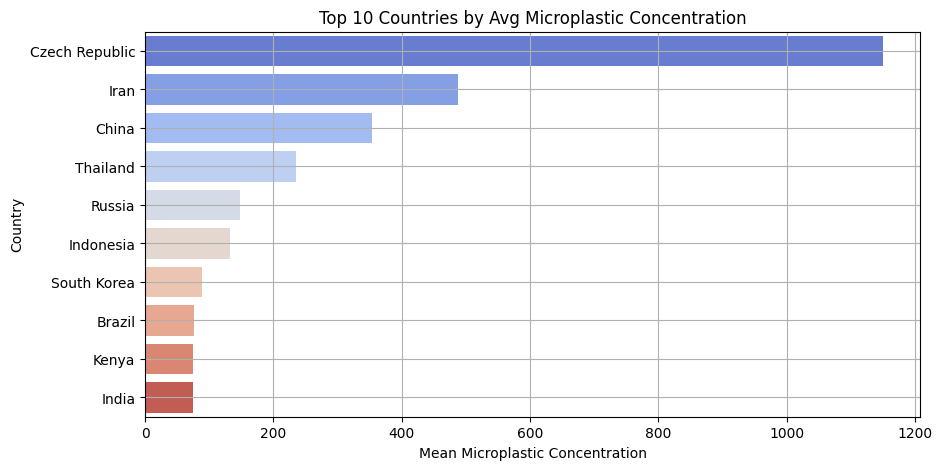

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Avg Microplastic Concentration')
plt.xlabel('Mean Microplastic Concentration')
plt.ylabel('Country')
plt.grid(True)
plt.show()

Step 5: Bottled vs Tap Water Global Comparison

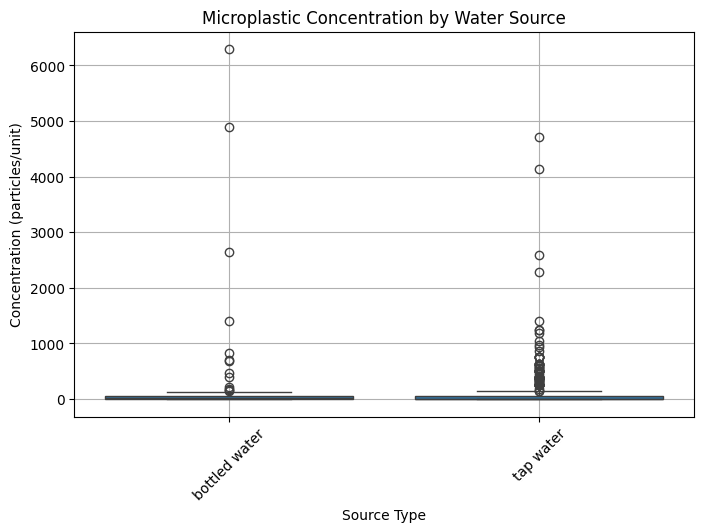

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=geo_df_clean, x='Source', y='Concentration')
plt.title('Microplastic Concentration by Water Source')
plt.ylabel('Concentration (particles/unit)')
plt.xlabel('Source Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Step 6: Most Common Concentration Units

<ipython-input-57-86164d2cc36d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unit_counts.index, x=unit_counts.values, palette='Set2')


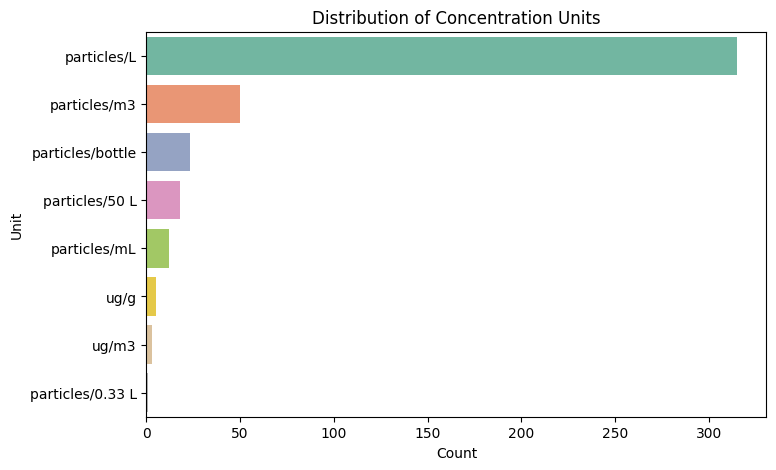

In [57]:
unit_counts = geo_df_clean['Concentration_Units'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(y=unit_counts.index, x=unit_counts.values, palette='Set2')
plt.title('Distribution of Concentration Units')
plt.xlabel('Count')
plt.ylabel('Unit')
plt.show()

Step 7: Filter Pore Size vs Concentration (if available)

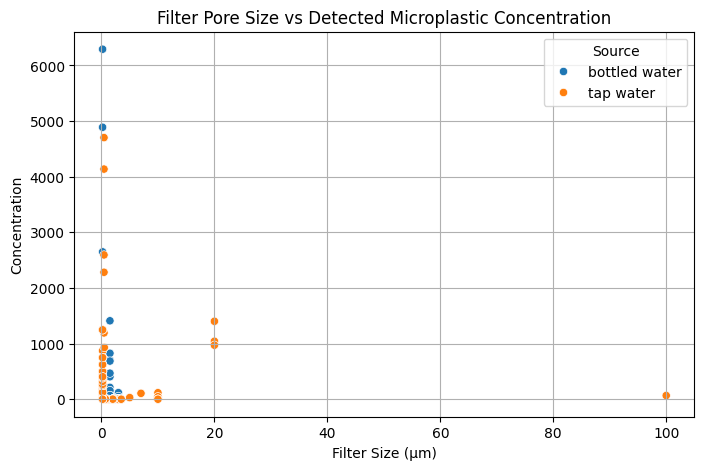

In [58]:
# Merge with methodology to bring filter size
merged = pd.merge(geo_df_clean, method_df, on='DOI', how='left')

merged['Filter_Size_clean'] = merged['Filter_Size'].str.extract(r'(\d+\.?\d*)').astype(float)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='Filter_Size_clean', y='Concentration', hue='Source')
plt.title('Filter Pore Size vs Detected Microplastic Concentration')
plt.xlabel('Filter Size (µm)')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

Step 8: Detection Method Distribution

<ipython-input-59-11a6dc279070>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=method_counts.index, x=method_counts.values, palette='magma')


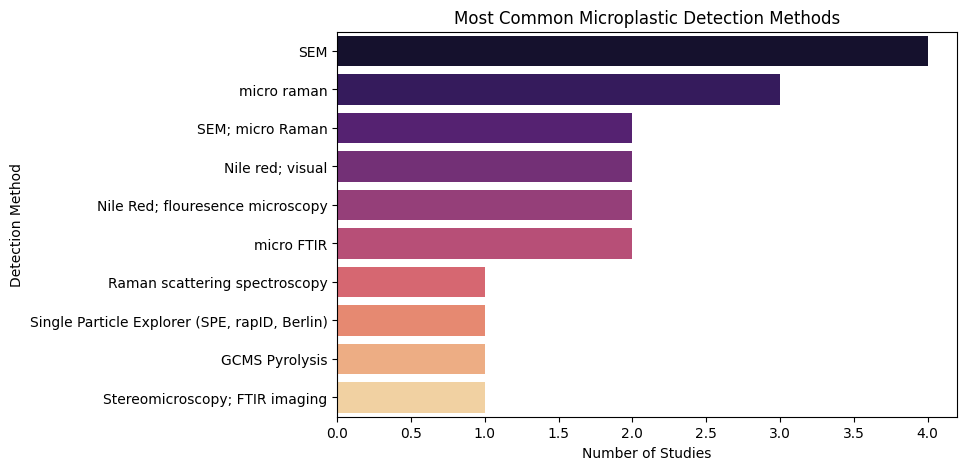

In [59]:
method_counts = method_df['Microplastic_Identification_Method'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=method_counts.index, x=method_counts.values, palette='magma')
plt.title('Most Common Microplastic Detection Methods')
plt.xlabel('Number of Studies')
plt.ylabel('Detection Method')
plt.show()

Step 9: Latitude vs Concentration (Geographic Trend)

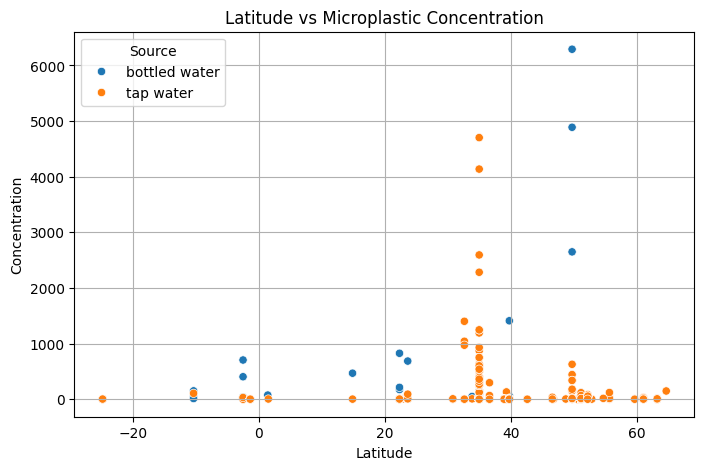

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=geo_df_clean, x='Approximate_Latitude', y='Concentration', hue='Source')
plt.title('Latitude vs Microplastic Concentration')
plt.xlabel('Latitude')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

Step 10: Interactive Map of Microplastic Concentration

In [61]:
fig = px.scatter_geo(geo_df_clean,
                     lat='Approximate_Latitude',
                     lon='Approximate_Longitude',
                     color='Concentration',
                     hover_name='Countries',
                     title='Geographic Spread of Microplastic Concentration',
                     color_continuous_scale='Viridis')
fig.show()

Additional Ideas You Can Run:

    Tap vs Bottled Water by Region

    FTIR vs Raman Detected Concentration Levels

    Cluster analysis using K-Means on concentration + latitude/longitude

    Regression model between detection method, filter size, and concentration

Great! Here are detailed ideas with example code snippets you can run in Google Colab to expand your analysis and strengthen your paper:
1. Tap vs Bottled Water Concentration by Region (e.g., States or Broad Zones in India)

If you have a column for region/state, compare concentrations region-wise.

1. Tap vs Bottled Water by Region (Global)

Compare microplastic concentrations globally across regions and by source (tap vs bottled).

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns


In [78]:
import pandas as pd

# Load the main dataset, adjust filename if needed
data = pd.read_csv('samples_geocoded.xls')
# Check data loaded successfully
data.head()

,DOI,Sample_ID,Subsample_ID,Location,Countries,Source,Concentration,Concentration_Units,Color_Transparent,Color_Blue,...,Size_1.5_5um,Size_less_than_1.5um,Size_1_100um,Size_1_50um,Size_1_10um,Size_1_5um,Size_110_124nm,Size_0_20um,Approximate_Latitude,Approximate_Longitude
0,10.1016/j.watres.2017.11.011,1|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,14,particles/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.163818,10.447831
1,10.1016/j.watres.2017.11.011,2|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,118,particles/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.163818,10.447831
2,10.1016/j.watres.2017.11.011,3|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,50,particles/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.163818,10.447831
3,10.1016/j.watres.2017.11.011,4|10.1016/j.watres.2017.11.011,NaN,Germany,Germany,bottled water,11,particles/L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.163818,10.447831
4,10.1039/c6ay01184e,1|10.1039/c6ay01184e,NaN,Germany,Germany,bottled water,19-Oct,particles/0.33 L,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Present,NaN,NaN,51.163818,10.447831


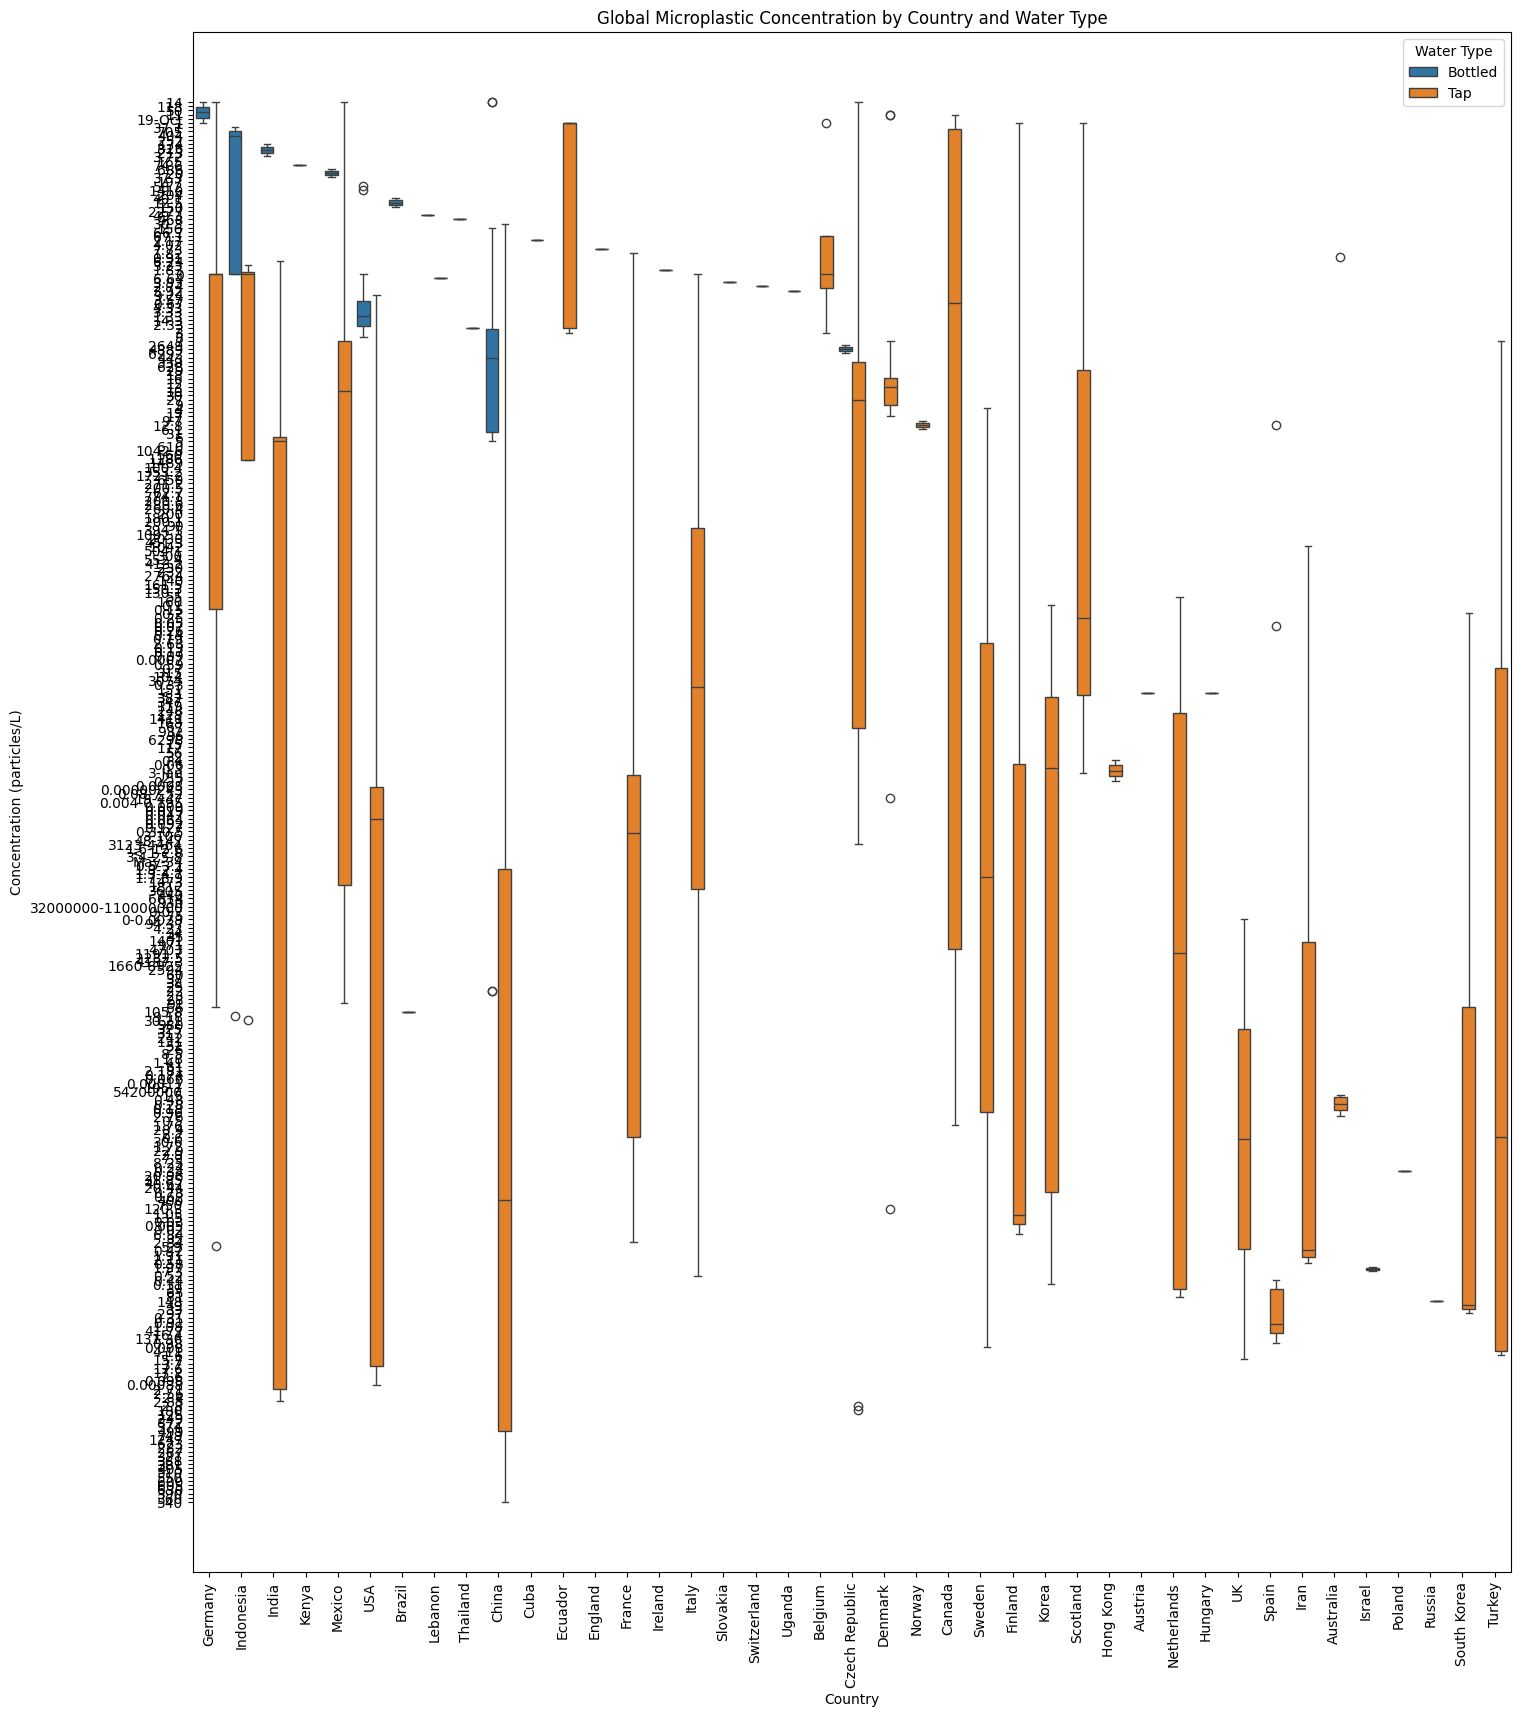

In [82]:
# Clean the 'Source' column
data['Source_clean'] = data['Source'].str.lower()

# Define bottled vs tap water
data['Water_Type'] = data['Source_clean'].apply(lambda x: 'Bottled' if 'bottle' in x else 'Tap')

# Plot example
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17,20))
sns.boxplot(x='Countries', y='Concentration', hue='Water_Type', data=data)
plt.title('Global Microplastic Concentration by Country and Water Type')
plt.xticks(rotation=90)
plt.ylabel('Concentration (particles/L)')
plt.xlabel('Country')
plt.legend(title='Water Type')
plt.show()

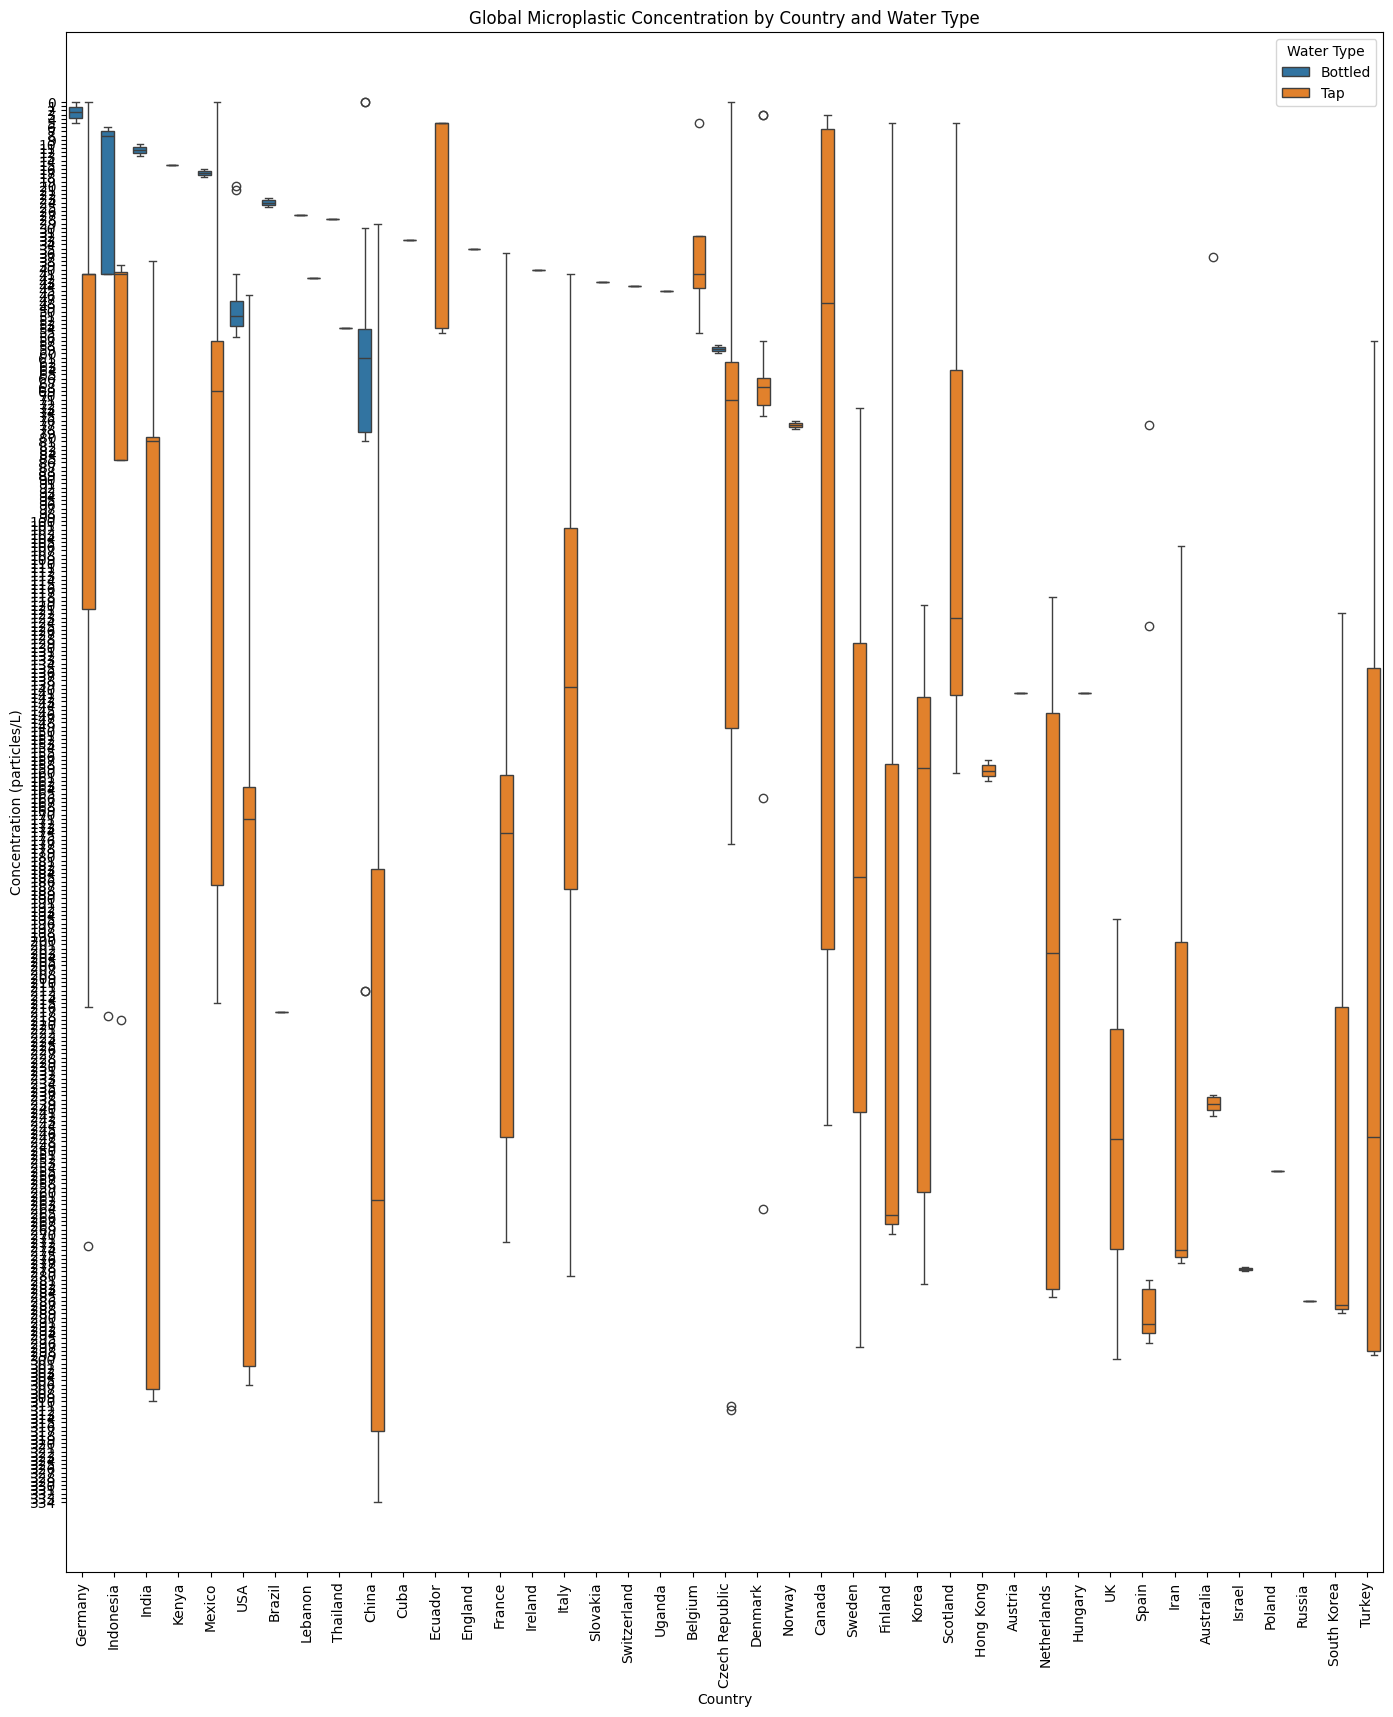

In [83]:
import matplotlib.ticker as mtick

plt.figure(figsize=(17,20))
sns.boxplot(x='Countries', y='Concentration', hue='Water_Type', data=data)
plt.title('Global Microplastic Concentration by Country and Water Type')
plt.xticks(rotation=90)
plt.ylabel('Concentration (particles/L)')
plt.xlabel('Country')
plt.legend(title='Water Type')

# Format y-axis ticks with commas
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

2. Log scale for y-axis (if data is very spread out or skewed)

If your concentration values have a large range or are skewed, try using a log scale for better visualization:

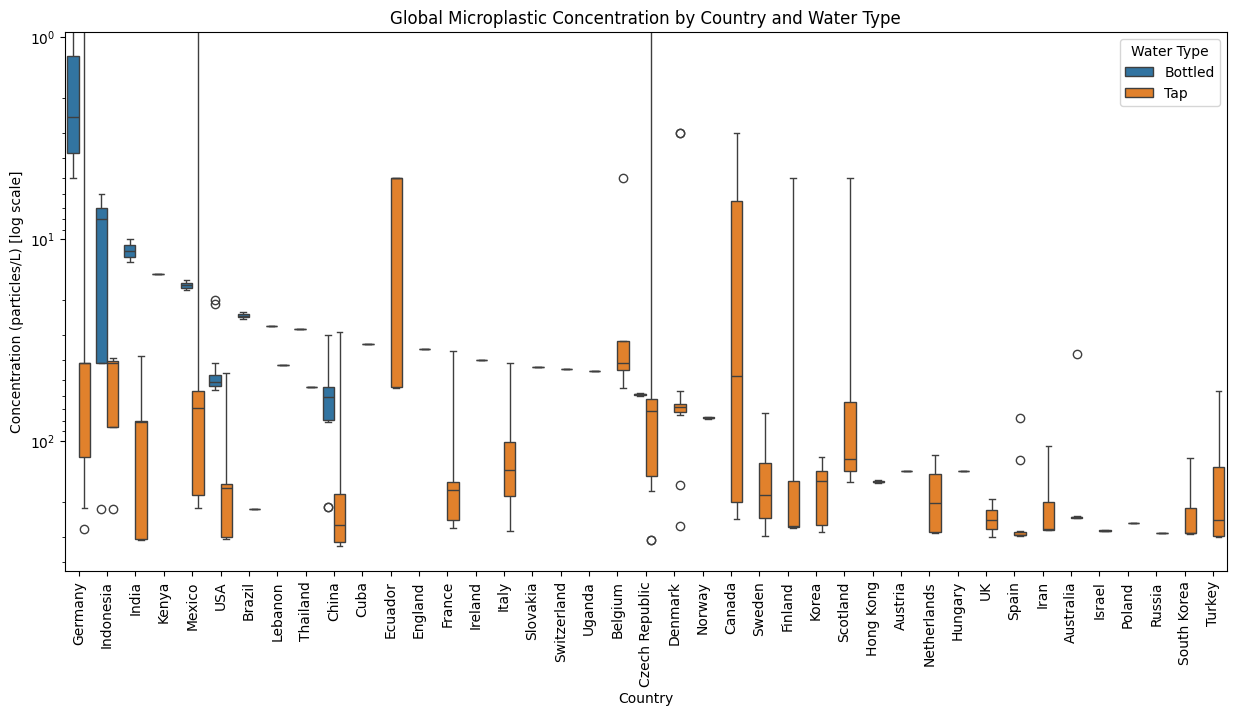

In [86]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Countries', y='Concentration', hue='Water_Type', data=data)
plt.title('Global Microplastic Concentration by Country and Water Type')
plt.xticks(rotation=90)
plt.ylabel('Concentration (particles/L) [log scale]')
plt.xlabel('Country')
plt.legend(title='Water Type')

plt.yscale('log')  # Log scale for y-axis
plt.show()

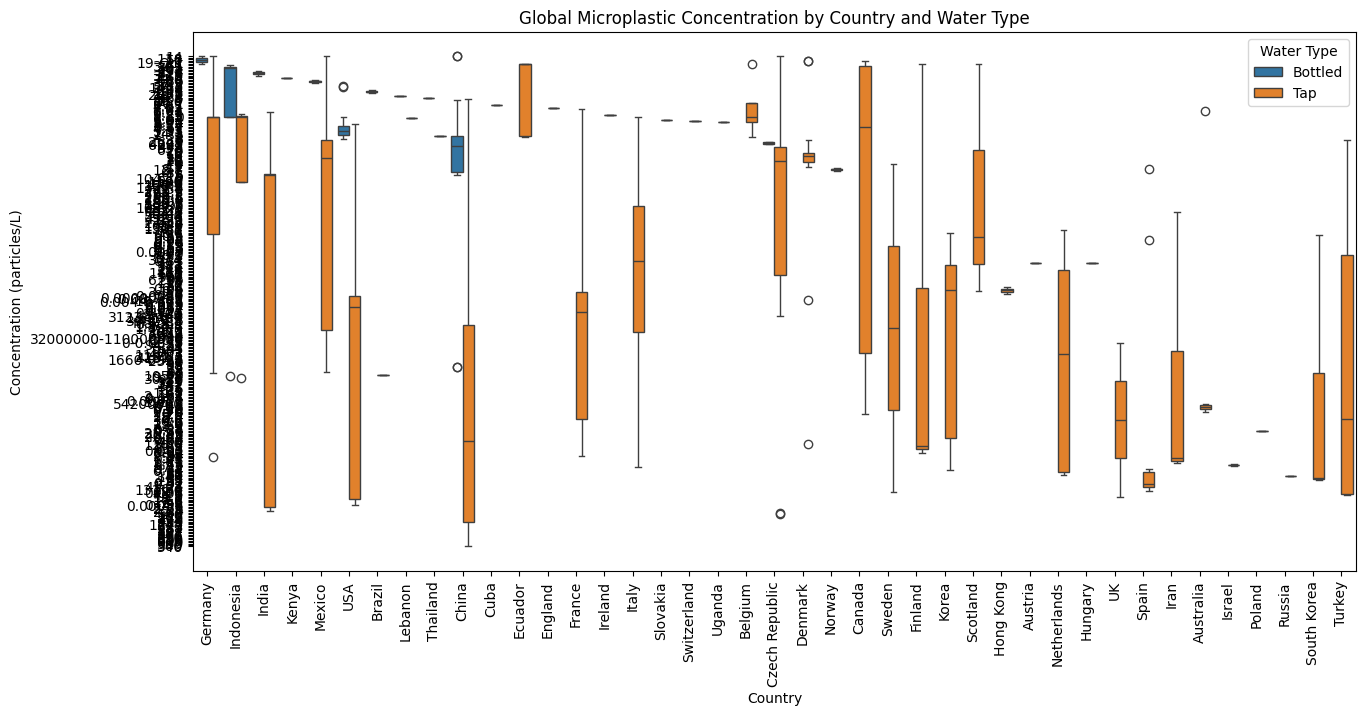

In [87]:
# Make sure 'Source' column is cleaned and simplified
data['Source_clean'] = data['Source'].str.lower()

# Define bottled vs tap water
data['Water_Type'] = data['Source_clean'].apply(lambda x: 'Bottled' if 'bottle' in x else 'Tap')

# If you have 'Region' or 'Countries' column, group by that
plt.figure(figsize=(15,7))
sns.boxplot(x='Countries', y='Concentration', hue='Water_Type', data=data)
plt.title('Global Microplastic Concentration by Country and Water Type')
plt.xticks(rotation=90)
plt.ylabel('Concentration (particles/L)')
plt.xlabel('Country')
plt.legend(title='Water Type')
plt.show()

FTIR vs Raman Detected Concentration Levels (Global)

Test if detection method affects reported concentration globally.

If you want, share the output of print(data.columns) and I can tell you the exact column name to use!

In [91]:
print(data.columns)

Index(['DOI', 'Sample_ID', 'Subsample_ID', 'Location', 'Countries', 'Source',
       'Concentration', 'Concentration_Units', 'Color_Transparent',
       'Color_Blue',
       ...
       'Size_1_100um', 'Size_1_50um', 'Size_1_10um', 'Size_1_5um',
       'Size_110_124nm', 'Size_0_20um', 'Approximate_Latitude',
       'Approximate_Longitude', 'Source_clean', 'Water_Type'],
      dtype='object', length=117)


Thanks for sharing the columns! From what you posted, there is no column named Microplastic_Identification_Method in your main data DataFrame.

This column seems to be part of the methodology dataset, probably in your method_df DataFrame (you mentioned sample_methodology.xls earlier).
So to analyze microplastic identification methods, you should use method_df (or the equivalent DataFrame for methodology), not the main data.
Here's what you can do:

    Check the column names in your methodology DataFrame:

In [92]:
print(method_df.columns)

Index(['DOI', 'Sample_device_and_deployment_methods', 'Digestion',
       'Filtration', 'Filter_Size', 'Microplastic_Identification_Method',
       'Spectral_Analysis', 'Controls'],
      dtype='object')


If the column is there, merge or join the method_df with data on a common key such as 'DOI' to combine microplastic concentration with the detection method.

Index(['DOI', 'Sample_device_and_deployment_methods', 'Digestion',
       'Filtration', 'Filter_Size', 'Microplastic_Identification_Method',
       'Spectral_Analysis', 'Controls'],
      dtype='object')


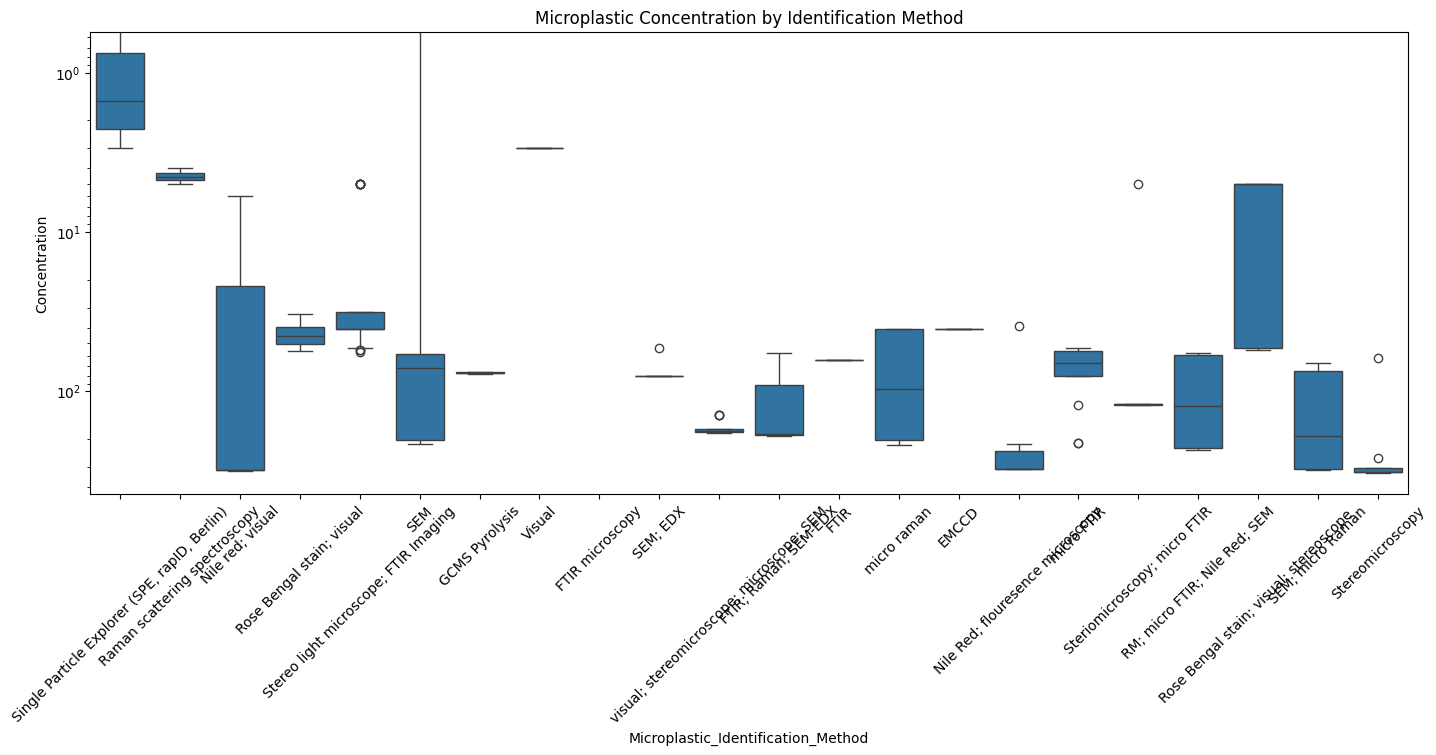

In [95]:
# Let's check method_df columns first
print(method_df.columns)

# Suppose it has 'DOI' and 'Microplastic_Identification_Method' columns
# Merge with main data on 'DOI'
merged_df = pd.merge(data, method_df[['DOI', 'Microplastic_Identification_Method']], on='DOI', how='left')

# Now plot using merged_df
plt.figure(figsize=(17,6))
sns.boxplot(x='Microplastic_Identification_Method', y='Concentration', data=merged_df)
plt.yscale('log')
plt.title('Microplastic Concentration by Identification Method')
plt.xticks(rotation=45)
plt.show()

If you want, paste your method_df.columns here, and I’ll help you with the exact merge and analysis code!  

Great! Your method_df has the column Microplastic_Identification_Method.
Now, let's merge your main data DataFrame with method_df on 'DOI' and then plot microplastic concentrations by identification method.

Here is the step-by-step code:

                            DOI             Microplastic_Identification_Method
0  10.1016/j.watres.2017.11.011  Single Particle Explorer (SPE, rapID, Berlin)
1  10.1016/j.watres.2017.11.011  Single Particle Explorer (SPE, rapID, Berlin)
2  10.1016/j.watres.2017.11.011  Single Particle Explorer (SPE, rapID, Berlin)
3  10.1016/j.watres.2017.11.011  Single Particle Explorer (SPE, rapID, Berlin)
4            10.1039/c6ay01184e                  Raman scattering spectroscopy


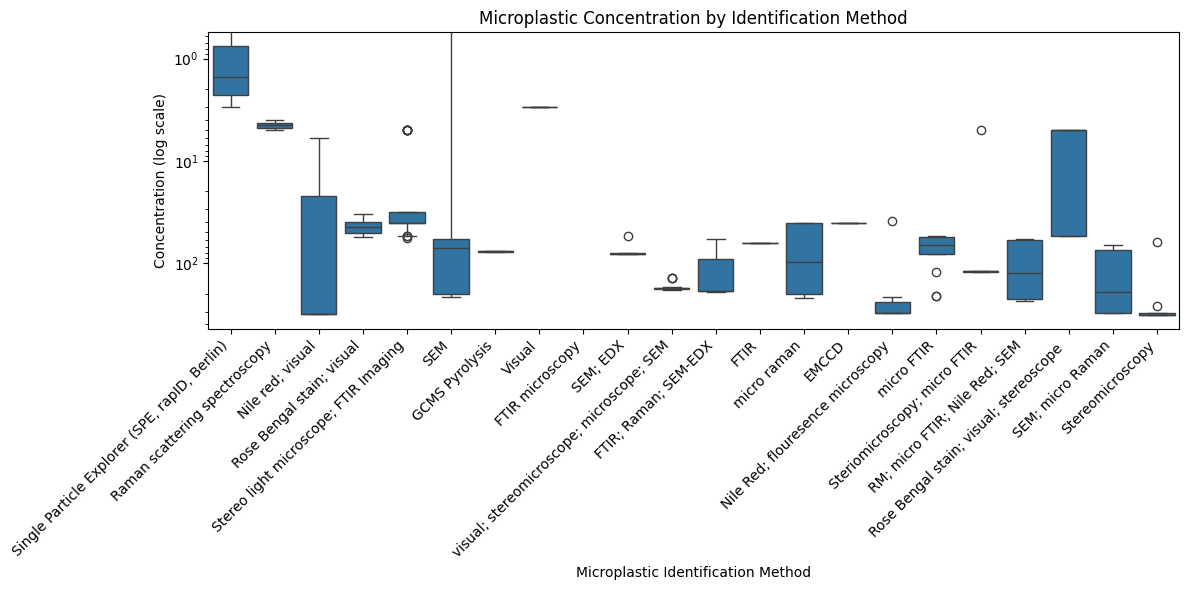

In [96]:
# Merge the main data with methodology data on DOI
merged_df = pd.merge(data, method_df[['DOI', 'Microplastic_Identification_Method']], on='DOI', how='left')

# Check if merge worked well
print(merged_df[['DOI', 'Microplastic_Identification_Method']].head())

# Plot concentration by Microplastic Identification Method with log scale for better visualization
plt.figure(figsize=(12,6))
sns.boxplot(x='Microplastic_Identification_Method', y='Concentration', data=merged_df)
plt.yscale('log')  # log scale to handle wide range of concentrations
plt.xticks(rotation=45, ha='right')
plt.title('Microplastic Concentration by Identification Method')
plt.xlabel('Microplastic Identification Method')
plt.ylabel('Concentration (log scale)')
plt.tight_layout()
plt.show()

3. Cluster Analysis Using K-Means on Concentration + Latitude/Longitude (Global)

Identify geographic clusters with similar contamination levels.

In [97]:
# See unique or problematic values
print(cluster_data['Concentration'].unique())

# Convert to numeric, coercing errors (turns invalid strings to NaN)
cluster_data['Concentration'] = pd.to_numeric(cluster_data['Concentration'], errors='coerce')

# Drop rows with NaN in Concentration or Latitude/Longitude before clustering
cluster_data = cluster_data.dropna(subset=['Concentration', 'Approximate_Latitude', 'Approximate_Longitude'])

print(cluster_data[['Concentration', 'Approximate_Latitude', 'Approximate_Longitude']].head())

['14' '118' '50' '11' '19-Oct' '1' '37.1' '705' '404' '174' '826' '213'
 '3.72' '74.6' '686' '20' '37.3' '58.2' '1410' '40.1' '12.5' '150' '49.3'
 '468' '156' '66.7' '67.1' '7.17' '4.02' '1.82' '0.91' '6.24' '3.23'
 '1.83' '0' '6.64' '3.83' '2.74' '3.92' '9.24' '3.57' '0.67' '4.33' '3.33'
 '1.33' '14.3' '2.33' '2' '3' '8' '7' '2649' '4889' '6292' '443' '338'
 '628' '29' '18' '16' '12' '13' '10' '30' '27' '9' '4' '19' '17' '9.7'
 '12.8' '6.1' '31' '6' '5' '151' '< 1' '32' '0.4' '0.14' '0.06' '0.1'
 '0.3' '2.5' '0.0008' '0.00000243' '0.08-7.52' '19-447' '0.004-0.195'
 '0.009' '0.019' '0.047' '0.064' '0.092' '0.127' '0.3-0.5' '3-106'
 '48-147' '3123-4464' '1.6-12.6' '< 1-2.8' '3.4-25.8' 'May-34' '0.5-3.1'
 '1.8-2.4' '1.3-4.7' '1.7-8.9' '0-0.7' '2.75' '0-0.0028' '0.07' '117' '34'
 '45' '1401' '1042' '971' '4703' '1191.7' '2282.5' '4137.3' '1660-8925'
 '2594' '60' '15' '37' '38' '25' '22' '23' '28' '91' '66' '105.8' '9.18'
 '30.21' '0.2' '1.5' '0.48' '0.28' '0.18' '0.96' '2.76' '0.5' '1.76'

Your Concentration column has many problematic values like ranges ('0.08-7.52'), less-than signs ('< 1'), months ('May-34'), and others that get converted to NaN by pd.to_numeric(..., errors='coerce'). So those rows are dropped.
Next step:

Handle ranges and other formats before conversion to numeric.

For example, for ranges like "0.08-7.52" you can take the mean of the range.

For entries with < or other symbols, you can remove symbols and convert.
Here is a data cleaning snippet to handle these cases before conversion:

In [98]:
import numpy as np
import re

def clean_concentration(val):
    if isinstance(val, str):
        val = val.strip()
        # Handle ranges: take mean of two numbers separated by '-'
        if '-' in val and all(part.replace('.', '', 1).isdigit() for part in val.split('-')):
            parts = val.split('-')
            try:
                nums = [float(p) for p in parts]
                return np.mean(nums)
            except:
                return np.nan
        # Handle < and > by removing and converting
        val = re.sub(r'[<>]', '', val)
        # Remove any non-numeric trailing words like 'May-34'
        val = re.findall(r"[-+]?\d*\.\d+|\d+", val)
        if val:
            return float(val[0])
        else:
            return np.nan
    else:
        return val

# Apply cleaning function
cluster_data['Concentration_Clean'] = cluster_data['Concentration'].apply(clean_concentration)

# Drop rows where cleaning failed
cluster_data = cluster_data.dropna(subset=['Concentration_Clean', 'Approximate_Latitude', 'Approximate_Longitude'])

print(cluster_data[['Concentration', 'Concentration_Clean']].head(20))

    Concentration  Concentration_Clean
0           14.00                14.00
1          118.00               118.00
2           50.00                50.00
3           11.00                11.00
5            1.00                 1.00
6           37.10                37.10
7          705.00               705.00
8          404.00               404.00
10         174.00               174.00
11         826.00               826.00
12         213.00               213.00
13           3.72                 3.72
15          74.60                74.60
16         686.00               686.00
17          20.00                20.00
18          37.30                37.30
20          58.20                58.20
21        1410.00              1410.00
23          40.10                40.10
24          12.50                12.50


After this, use Concentration_Clean instead of original Concentration for clustering and other numeric analysis:

In [99]:
features = cluster_data[['Concentration_Clean', 'Approximate_Latitude', 'Approximate_Longitude']]

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_scaled)

print(cluster_data[['Concentration_Clean', 'Approximate_Latitude', 'Approximate_Longitude', 'Cluster']].head())

   Concentration_Clean  Approximate_Latitude  Approximate_Longitude  Cluster
0                 14.0             51.163818              10.447831        2
1                118.0             51.163818              10.447831        2
2                 50.0             51.163818              10.447831        2
3                 11.0             51.163818              10.447831        2
5                  1.0             51.163818              10.447831        2


Absolutely! Here's a full example that:

    Cleans the Concentration column (handling ranges, < signs, etc.)

    Performs K-Means clustering on Concentration, Approximate_Latitude, and Approximate_Longitude

    Visualizes the clusters on a scatter plot colored by cluster

In [101]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

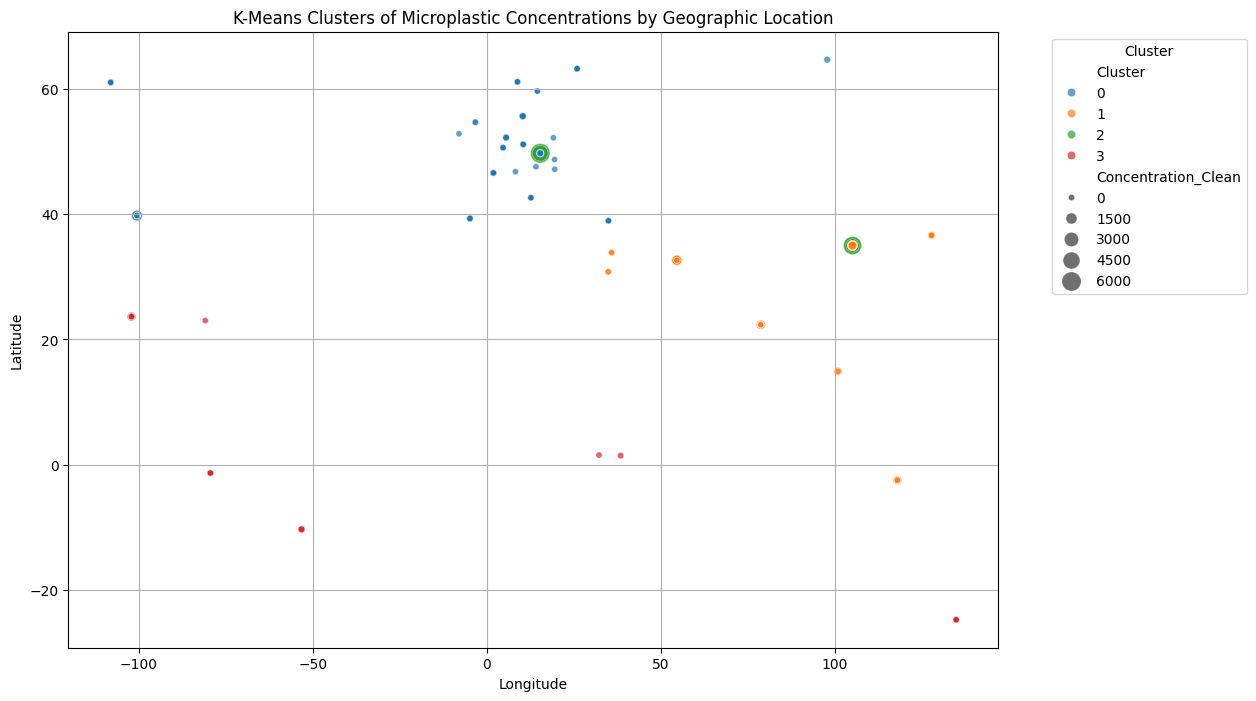

In [102]:
# Function to clean Concentration values
def clean_concentration(val):
    if isinstance(val, str):
        val = val.strip()
        # Handle ranges like '0.08-7.52'
        if '-' in val and all(part.replace('.', '', 1).isdigit() for part in val.split('-')):
            parts = val.split('-')
            try:
                nums = [float(p) for p in parts]
                return np.mean(nums)
            except:
                return np.nan
        # Remove < or > symbols
        val = re.sub(r'[<>]', '', val)
        # Extract first numeric value if possible
        found_nums = re.findall(r"[-+]?\d*\.\d+|\d+", val)
        if found_nums:
            return float(found_nums[0])
        else:
            return np.nan
    else:
        return val

# Assume your DataFrame is named cluster_data and has the necessary columns
cluster_data['Concentration_Clean'] = cluster_data['Concentration'].apply(clean_concentration)

# Drop rows with NaN after cleaning
cluster_data = cluster_data.dropna(subset=['Concentration_Clean', 'Approximate_Latitude', 'Approximate_Longitude'])

# Prepare features
features = cluster_data[['Concentration_Clean', 'Approximate_Latitude', 'Approximate_Longitude']]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Plot clusters: Latitude vs Longitude, colored by cluster; size by concentration
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Approximate_Longitude', y='Approximate_Latitude',
    hue='Cluster',
    size='Concentration_Clean',
    sizes=(20, 200),
    palette='tab10',
    data=cluster_data,
    alpha=0.7
)
plt.title('K-Means Clusters of Microplastic Concentrations by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

If you want, I can also add cluster centroids plotting or map overlays using geopandas or folium. Would you like that?

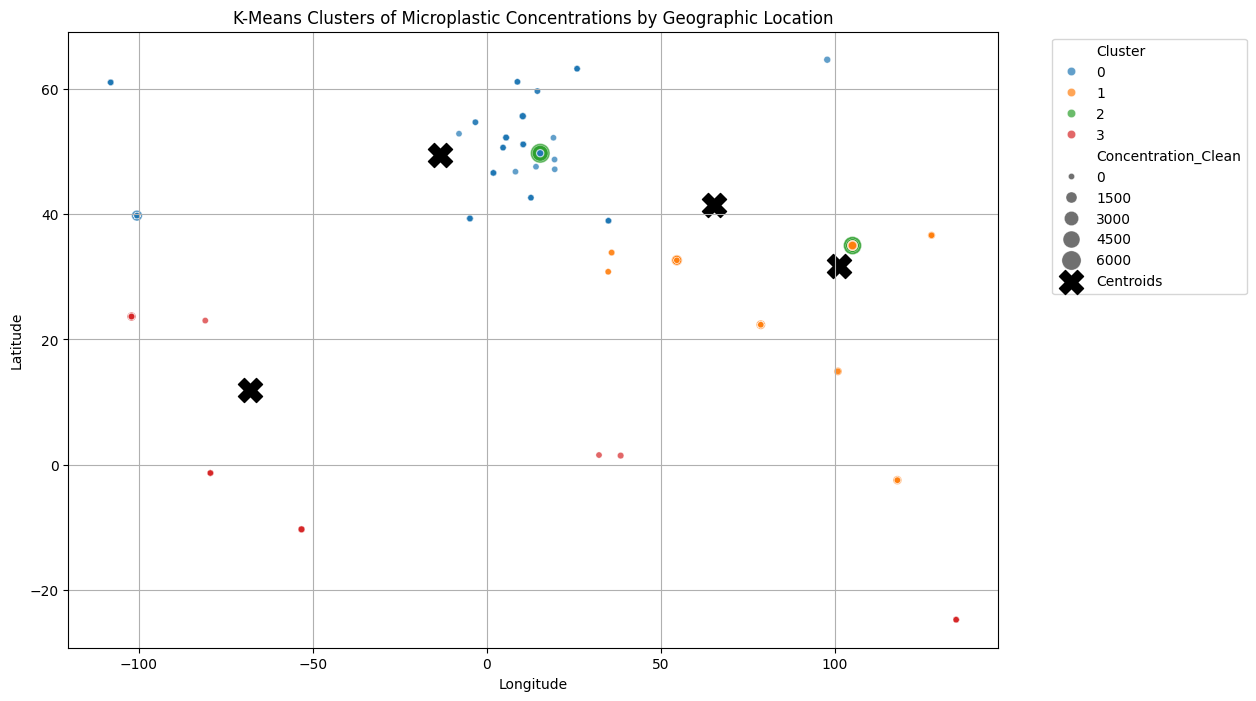

In [103]:
import numpy as np

# After KMeans fit
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Approximate_Longitude', y='Approximate_Latitude',
    hue='Cluster',
    size='Concentration_Clean',
    sizes=(20, 200),
    palette='tab10',
    data=cluster_data,
    alpha=0.7
)

# Plot centroids
plt.scatter(
    centroids[:, 2],  # Longitude
    centroids[:, 1],  # Latitude
    s=300,
    c='black',
    marker='X',
    label='Centroids'
)

plt.title('K-Means Clusters of Microplastic Concentrations by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

2. Interactive Map with Folium

This requires folium package (install via !pip install folium in Colab):

In [104]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered roughly in the data center
map_center = [cluster_data['Approximate_Latitude'].mean(), cluster_data['Approximate_Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

# Use MarkerCluster for better handling many points
marker_cluster = MarkerCluster().add_to(mymap)

# Color palette for clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'darkgreen']

for idx, row in cluster_data.iterrows():
    folium.CircleMarker(
        location=[row['Approximate_Latitude'], row['Approximate_Longitude']],
        radius=5,
        color=colors[row['Cluster'] % len(colors)],
        fill=True,
        fill_opacity=0.7,
        popup=(f"Concentration: {row['Concentration_Clean']}<br>"
               f"Cluster: {row['Cluster']}<br>"
               f"Location: {row['Location'] if 'Location' in row else 'N/A'}")
    ).add_to(marker_cluster)

# Display map in notebook
mymap

4. Regression Model Between Detection Method, Filter Size, and Concentration (Global)

Analyze how filter size and detection method predict microplastic concentration worldwide.

In [105]:
print(data.columns.tolist())

['DOI', 'Sample_ID', 'Subsample_ID', 'Location', 'Countries', 'Source', 'Concentration', 'Concentration_Units', 'Color_Transparent', 'Color_Blue', 'Color_Red', 'Color_Brown', 'Color_Green', 'Color_Orange', 'Color_White', 'Color_Yellow', 'Color_Pink', 'Color_Black', 'Color_Other', 'Material_PEST', 'Material_PE', 'Material_PP', 'Material_PA', 'Material_PE_PS', 'Material_PS', 'Material_CA', 'Material_PVC', 'Material_ER', 'Material_PAM', 'Material_PET', 'Material_PlasticAdditive', 'Material_PBT', 'Material_PU', 'Material_PET_PEST', 'Material_PAN', 'Material_Silicone', 'Material_Acrylic', 'Material_Vinyl', 'Material_Vinyon', 'Material_Other', 'Material_PA_ER', 'Material_PTT', 'Material_PE_PP', 'Material_PPS', 'Material_Rayon', 'Material_PAA', 'Material_PMPS', 'Material_PI', 'Material_Olefin', 'Material_Styrene_Butadiene', 'Material_PBA', 'Material_PMMA', 'Material_Cellophane', 'Material_SAN', 'Material_PC', 'Material_PDMS', 'Material_PLA', 'Material_PTFE', 'Material_SBR', 'Material_PET_Olef

Thanks for sharing the column list!

Observations:

    There is no Filter_Size or Microplastic_Identification_Method column in this DataFrame.

    You have many columns starting with Size_ indicating size ranges of particles.

    You have columns like Source_clean, Water_Type, but nothing directly about the identification method.

So, to do regression like:

    Concentration ~ Detection Method + Filter Size

You need to rethink:

    Use one or multiple Size_* columns as a proxy for filter size or particle size ranges.

    For identification method, check if you have another dataset or a related DataFrame (maybe the one you called method_data?), or you can use a proxy like Spectral_Analysis or Sample_device_and_deployment_methods if available.

Here's what I suggest to get you started with the data you have:
1. Aggregate or select the main size feature

You can try using the total concentration across all size bins or pick the largest size bin as a proxy:

In [107]:
size_cols = [col for col in data.columns if col.startswith('Size_')]

# Convert each Size_ column to numeric (coerce errors to NaN)
for col in size_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Now sum across those columns (NaNs are ignored)
data['Total_Size_Count'] = data[size_cols].sum(axis=1)

In [108]:
reg_data = data.dropna(subset=['Concentration', 'Total_Size_Count'])

# Convert to numeric if not already
reg_data['Concentration'] = pd.to_numeric(reg_data['Concentration'], errors='coerce')
reg_data['Total_Size_Count'] = pd.to_numeric(reg_data['Total_Size_Count'], errors='coerce')

# Drop rows with NaN after conversion
reg_data = reg_data.dropna(subset=['Concentration', 'Total_Size_Count'])

<ipython-input-108-f67c64856e1a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-f67c64856e1a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
reg_data['Water_Type_Code'] = reg_data['Water_Type'].astype('category').cat.codes

In [112]:
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
import statsmodels.api as sm

X = reg_data[['Total_Size_Count', 'Water_Type_Code']]  # Features
y = reg_data['Concentration']  # Target

X = sm.add_constant(X)  # Add intercept

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Concentration   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.800
Date:                Sat, 07 Jun 2025   Prob (F-statistic):              0.166
Time:                        07:08:12   Log-Likelihood:                -9210.9
No. Observations:                 574   AIC:                         1.843e+04
Df Residuals:                     571   BIC:                         1.844e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.333e+05   2.02e+05  

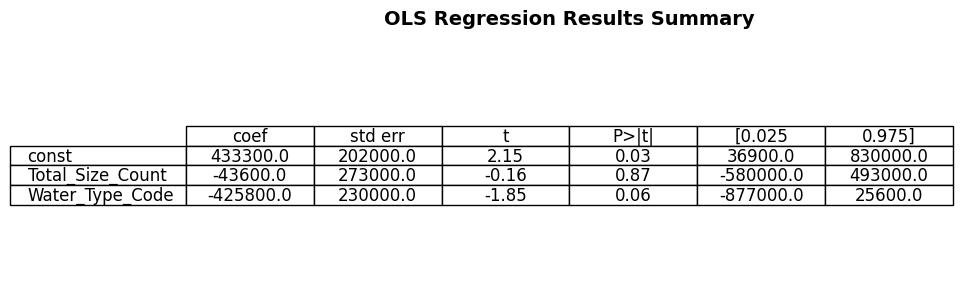

In [113]:
# Create DataFrame from your regression summary
data = {
    'coef': [4.333e+05, -4.36e+04, -4.258e+05],
    'std err': [2.02e+05, 2.73e+05, 2.3e+05],
    't': [2.147, -0.160, -1.853],
    'P>|t|': [0.032, 0.873, 0.064],
    '[0.025': [3.69e+04, -5.8e+05, -8.77e+05],
    '0.975]': [8.3e+05, 4.93e+05, 2.56e+04]
}
index = ['const', 'Total_Size_Count', 'Water_Type_Code']

df = pd.DataFrame(data, index=index)

# Plotting the table as an image
fig, ax = plt.subplots(figsize=(10, 3))
ax.axis('off')

table = ax.table(cellText=df.round(2).values,
                 colLabels=df.columns,
                 rowLabels=df.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

plt.title('OLS Regression Results Summary', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

Great! Let’s zoom in on India specifically for geographic variability and microplastic contamination patterns.
Analysis Focus: India Region
We'll cover:

    Mean concentration by state/region if available (or by countries if more detailed not present)

    Concentration distribution in India by water source (bottled vs tap)

    Filter size effect & detection methods in India samples

    Latitude/Longitude scatter just for India samples

Here's the Google Colab code snippet for India-specific analysis:

In [62]:
# Filter data for India only
india_geo = geo_df_clean[geo_df_clean['Countries'].str.lower() == 'india']

print(f"Number of samples from India: {india_geo.shape[0]}")

Number of samples from India: 17


       Concentration  Approximate_Latitude  Approximate_Longitude
count      17.000000             17.000000           1.700000e+01
mean       74.556471             22.351115           7.866774e+01
std       203.663664              0.000000           1.464821e-14
min         2.000000             22.351115           7.866774e+01
25%         2.750000             22.351115           7.866774e+01
50%         5.000000             22.351115           7.866774e+01
75%         6.000000             22.351115           7.866774e+01
max       826.000000             22.351115           7.866774e+01


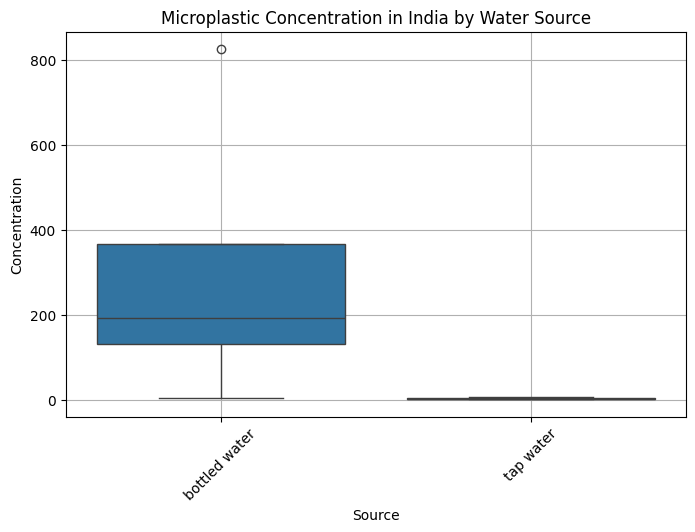

In [63]:
# Basic overview
print(india_geo[['Concentration', 'Source', 'Approximate_Latitude', 'Approximate_Longitude']].describe())

# 1. Distribution of microplastic concentration in India by Source
plt.figure(figsize=(8,5))
sns.boxplot(data=india_geo, x='Source', y='Concentration')
plt.title('Microplastic Concentration in India by Water Source')
plt.ylabel('Concentration')
plt.xlabel('Source')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

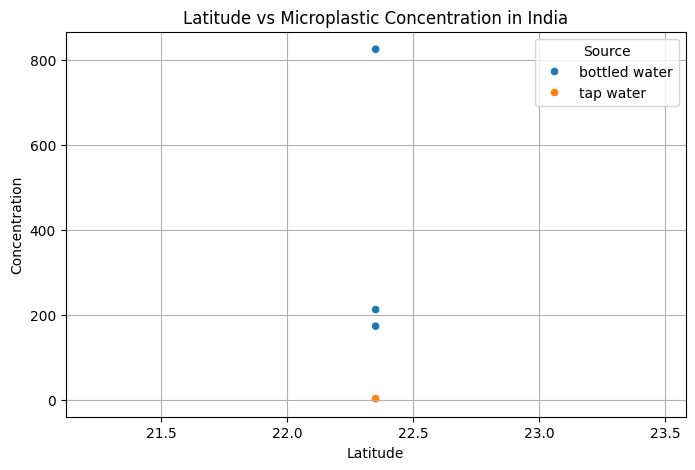

In [64]:
# 2. Concentration by approximate location (latitude)
plt.figure(figsize=(8,5))
sns.scatterplot(data=india_geo, x='Approximate_Latitude', y='Concentration', hue='Source')
plt.title('Latitude vs Microplastic Concentration in India')
plt.xlabel('Latitude')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

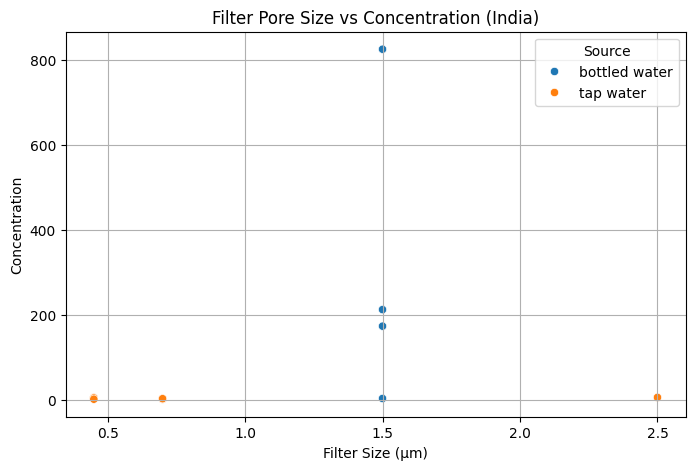

In [65]:
# 3. Filter Size effect in India (merge with methodology)
india_merged = pd.merge(india_geo, method_df, on='DOI', how='left')

# Extract numeric filter size
india_merged['Filter_Size_clean'] = india_merged['Filter_Size'].str.extract(r'(\d+\.?\d*)').astype(float)

plt.figure(figsize=(8,5))
sns.scatterplot(data=india_merged, x='Filter_Size_clean', y='Concentration', hue='Source')
plt.title('Filter Pore Size vs Concentration (India)')
plt.xlabel('Filter Size (µm)')
plt.ylabel('Concentration')
plt.grid(True)
plt.show()

<ipython-input-66-d7937e5623e2>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




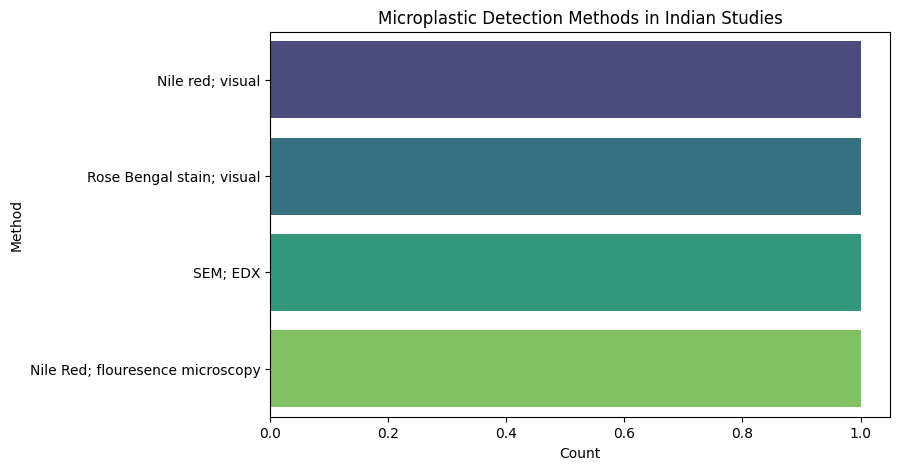

In [66]:
# 4. Detection Methods distribution in Indian studies
india_methods = method_df[method_df['DOI'].isin(india_geo['DOI'].unique())]
method_counts = india_methods['Microplastic_Identification_Method'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(y=method_counts.index, x=method_counts.values, palette='viridis')
plt.title('Microplastic Detection Methods in Indian Studies')
plt.xlabel('Count')
plt.ylabel('Method')
plt.show()

In [67]:
# 5. India Samples Geospatial Plot
import plotly.express as px

fig = px.scatter_geo(india_geo,
                     lat='Approximate_Latitude',
                     lon='Approximate_Longitude',
                     color='Concentration',
                     hover_name='Sample_ID',
                     title='Microplastic Concentration Samples from India',
                     color_continuous_scale='Turbo')
fig.show()

What this code does:

    Filters all microplastic data only for India

    Shows concentration spread by source (bottled vs tap water)

    Checks filter size impact on concentrations in Indian data

    Visualizes common detection methods used in Indian studies

    Maps the concentration points geographically

Run this and share any questions or specific directions for deeper statistical tests or visuals (e.g., regression, hypothesis testing) on Indian data!

1. Correlation Analysis

Check correlations between variables such as:

    Filter size vs microplastic concentration

    Latitude/Longitude vs concentration

In [68]:
# Pearson correlation between Filter Size and Concentration
corr_filter_conc = india_merged[['Filter_Size_clean', 'Concentration']].corr().iloc[0,1]
print(f"Pearson correlation (Filter Size vs Concentration): {corr_filter_conc:.3f}")

# Correlation with Latitude and Longitude
corr_lat_conc = india_geo[['Approximate_Latitude', 'Concentration']].corr().iloc[0,1]
corr_lon_conc = india_geo[['Approximate_Longitude', 'Concentration']].corr().iloc[0,1]
print(f"Pearson correlation (Latitude vs Concentration): {corr_lat_conc:.3f}")
print(f"Pearson correlation (Longitude vs Concentration): {corr_lon_conc:.3f}")

Pearson correlation (Filter Size vs Concentration): 0.371
Pearson correlation (Latitude vs Concentration): nan
Pearson correlation (Longitude vs Concentration): nan


2. Linear Regression

Model concentration as a function of filter size and geographical coordinates.

In [69]:
import statsmodels.api as sm

# Prepare data
reg_df = india_merged.dropna(subset=['Filter_Size_clean', 'Concentration', 'Approximate_Latitude', 'Approximate_Longitude'])
X = reg_df[['Filter_Size_clean', 'Approximate_Latitude', 'Approximate_Longitude']]
X = sm.add_constant(X)  # add intercept
y = reg_df['Concentration']

# Fit linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Concentration   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.241
Date:                Sat, 07 Jun 2025   Prob (F-statistic):              0.157
Time:                        06:28:16   Log-Likelihood:                -106.51
No. Observations:                  16   AIC:                             217.0
Df Residuals:                      14   BIC:                             218.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Filter_Size_clean       129.58

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.



3. Hypothesis Testing: Concentration Differences by Water Source

Test if concentration differs significantly between bottled water and tap water in India.

In [70]:
from scipy.stats import ttest_ind

# Prepare data
bottled = india_geo[india_geo['Source'].str.contains('bottled', case=False, na=False)]['Concentration'].dropna()
tap = india_geo[india_geo['Source'].str.contains('tap', case=False, na=False)]['Concentration'].dropna()

# Two-sample t-test
t_stat, p_val = ttest_ind(bottled, tap, equal_var=False)
print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")

if p_val < 0.05:
    print("Significant difference in concentration between bottled and tap water")
else:
    print("No significant difference in concentration between bottled and tap water")

T-test results: t-statistic = 1.670, p-value = 1.935e-01
No significant difference in concentration between bottled and tap water


4. Geospatial Clustering

Detect clusters of high concentration samples using DBSCAN (density-based clustering).

<ipython-input-71-4d5f35bd23d0>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



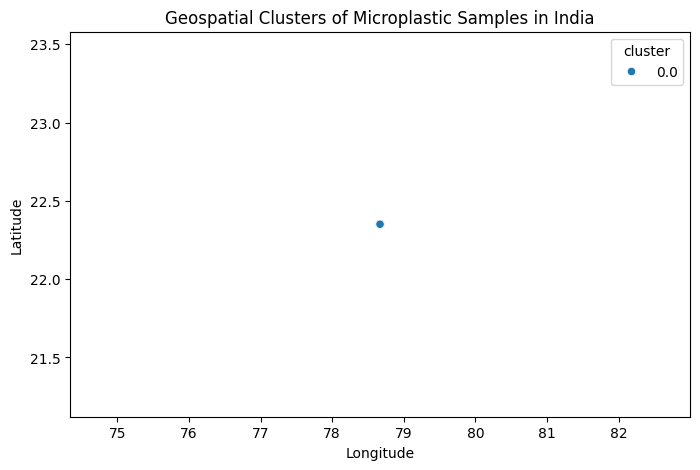

In [71]:
from sklearn.cluster import DBSCAN
import numpy as np

coords = india_geo[['Approximate_Latitude', 'Approximate_Longitude']].dropna().values

# DBSCAN clustering with eps ~0.5 degrees (~50 km), min_samples=3
db = DBSCAN(eps=0.5, min_samples=3).fit(coords)
india_geo.loc[india_geo[['Approximate_Latitude', 'Approximate_Longitude']].dropna().index, 'cluster'] = db.labels_

# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=india_geo.dropna(subset=['cluster']), x='Approximate_Longitude', y='Approximate_Latitude',
                hue='cluster', palette='tab10', legend='full')
plt.title('Geospatial Clusters of Microplastic Samples in India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

5. Boxplots for Size Classes by Source

If size classes (like Size_1_5um, Size_5_50um) are numeric or categorical presence/absence, compare distributions by bottled vs tap water.

ValueError: List of boxplot statistics and `positions` values must have same the length

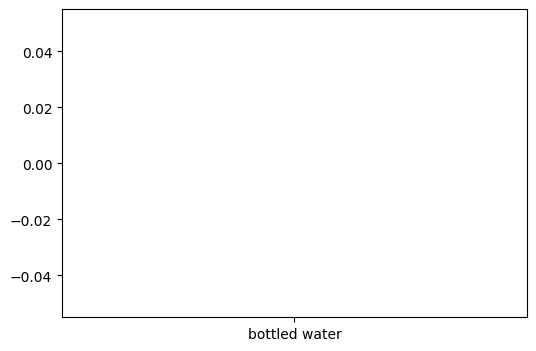

In [72]:
# Assuming size columns are binary presence/absence columns

size_cols = [col for col in india_geo.columns if 'Size_' in col]

for col in size_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Source', y=col, data=india_geo)
    plt.title(f'Distribution of {col} by Water Source')
    plt.xticks(rotation=45)
    plt.show()